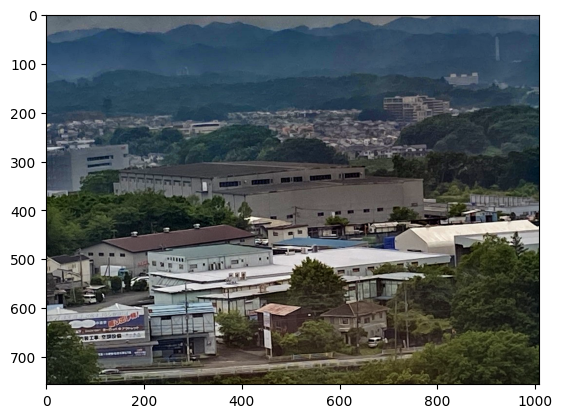

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
omega = 0.9
pach = 16
def Hase(input_img,output_img):
  img_i = cv2.imread(input_img)
  img_j = cv2.imread(input_img)
  h, w, channel = img_i.shape
  a = 0
  
  min_l = 255
  img_k = cv2.cvtColor(img_i,cv2.COLOR_BGR2GRAY)
  img_l = cv2.cvtColor(img_i,cv2.COLOR_BGR2GRAY)
  #K画像生成
  for y in range(h):
    for x in range(w):
      img_k[y,x] = min(img_i[y,x])
      if a<img_k[y,x]:
        a=img_k[y,x]
  #L画像生成
  for y1 in range(h//pach+1):
    y=y1*pach
    for x1 in range(w//pach+1):
      x=x1*pach
      for i in range(pach):
        for j in range(pach):
          try :
            if min_l>img_k[y+i,x+j]:
              min_l = img_k[y+i,x+j]
          except IndexError:
            continue
      
      for i in range(pach):
        for j in range(pach):
          try:
            img_l[y+i,x+j]=min_l
          except IndexError:
            continue
      min_l=255
  #M画像生成
  img_m = cv2.GaussianBlur(img_l,(151,151),51)

  #J画像生成
  for y in range(h):
    for x in range(w):
      #tの算出
      t = 1 - omega*(img_m[y,x]/a)
      for c in range(channel):
        pixcel=(img_i[y,x,c]-(1-t)*a)/t
        
        pixcel = int(pixcel)
        if pixcel>255:
          pixcel=255
        if pixcel<0:
          pixcel=0
        img_j[y,x,c] = int(pixcel)
  #画像の書き出し
  cv2.imwrite(output_img,img_j)
  img_j = cv2.cvtColor(img_j, cv2.COLOR_BGR2RGB)
  plt.imshow(img_j)

for i in range(1,6):
  input = 'PATH'
  output = 'PATH'
  Hase(input,output)
